In [13]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

# Text processing and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Data preprocessing
from sklearn.preprocessing import LabelEncoder

# Model selection and training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import all usfull libraries.
import seaborn as sns
import pandas as pd # Import pandas library for data manipulation
import numpy as np # Import numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for advanced plotting
import re # Import regular expression library for text manipulation
import string # Import string library for string operations
import nltk # Import nltk library for natural language processing
from nltk.corpus import stopwords # Import stopwords from nltk
from nltk.stem import PorterStemmer # Import PorterStemmer for stemming
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer for lemmatizationimport re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report




import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [14]:
data = pd.read_csv('/content/drive/MyDrive/all ml/fake_job_postings.csv')

In [15]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [16]:
sample_data=data[["employment_type","required_experience","required_education","description","fraudulent"]]

In [17]:
balanced_data = pd.DataFrame()

# Iterate over each class
for class_label in sample_data['fraudulent'].unique():
    class_data = sample_data[sample_data['fraudulent'] == class_label]
    if len(class_data) >= 100:
        sampled_data = class_data.sample(n=100, random_state=42, replace=False)
    balanced_data = pd.concat([balanced_data, sampled_data])

# Reset the index of the balanced dataset
balanced_data.reset_index(drop=True, inplace=True)

# Display the balanced dataset
print(balanced_data['fraudulent'].value_counts())
#sample_data
#data=balanced_data

fraudulent
0    100
1    100
Name: count, dtype: int64


In [18]:
balanced_data.to_csv("balanced_data.csv", index=False)

In [19]:
# Basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

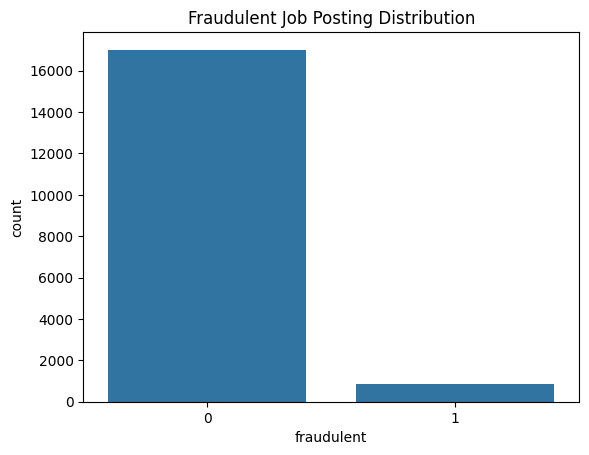

In [20]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced visualization

data.info()  # Display basic information about the dataset, including column names, data types, and non-null values

data.isnull().sum()  # Count the number of missing (null) values in each column

data.nunique()  # Count the number of unique values in each column

sns.countplot(x='fraudulent', data=data)  # Create a count plot showing the distribution of fraudulent and non-fraudulent job postings
plt.title('Fraudulent Job Posting Distribution')  # Set the title of the plot
plt.show()  # Display the plot


In [21]:
import warnings  # Import the warnings module to handle warning messages
warnings.filterwarnings("ignore")  # Ignore all warning messages to keep the output clean

# Drop rows where 'title', 'location', or 'description' have missing (NaN) values
data.dropna(subset=['title', 'location', 'description'], inplace=True)

# Fill missing values in the 'salary_range' column with 'Not Provided'
data['salary_range'].fillna('Not Provided', inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical variables

label_encoder = LabelEncoder()  # Create an instance of LabelEncoder

# Convert 'employment_type' to string (in case of NaN values) and encode it into numerical values
#data['employment_type'] = label_encoder.fit_transform(data['employment_type'].astype(str))

# Convert 'required_experience' to string and encode it into numerical values
#data['required_experience'] = label_encoder.fit_transform(data['required_experience'].astype(str))

# Convert 'required_education' to string and encode it into numerical values
#data['required_education'] = label_encoder.fit_transform(data['required_education'].astype(str))


In [23]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the label encoder
le_employment_type = LabelEncoder()
le_employment_type = le_employment_type.fit(data['employment_type'].astype(str))
#data['employment_type'] = le_employment_type.transform(data['employment_type'].astype(str))

# Save the fitted label encoder to a pickle file
with open('label_encoder_employment_type.pkl', 'wb') as file:
    pickle.dump(le_employment_type, file)


In [24]:
print(list(le_employment_type.classes_))

['Contract', 'Full-time', 'Other', 'Part-time', 'Temporary', 'nan']


In [25]:
# Initialize and fit the label encoder
le_required_experience = LabelEncoder()
le_required_experience = le_required_experience.fit(data['required_experience'].astype(str))
#data['required_experience'] = le_required_experience.fit_transform(data['required_experience'].astype(str))

# Save the fitted label encoder to a pickle file
with open('label_encoder_required_experience.pkl', 'wb') as file:
    pickle.dump(le_required_experience, file)

In [26]:
print(list(le_required_experience.classes_))

['Associate', 'Director', 'Entry level', 'Executive', 'Internship', 'Mid-Senior level', 'Not Applicable', 'nan']


In [27]:
# Initialize and fit the label encoder
le_required_education = LabelEncoder()
le_required_education = le_required_education.fit(data['required_education'].astype(str))
#le_employment_type = le_employment_type.fit(data['employment_type'].astype(str))

# Save the fitted label encoder to a pickle file
with open('label_encoder_required_education.pkl', 'wb') as file:
    pickle.dump(le_required_education, file)

In [28]:
print(list(le_required_education.classes_))

['Associate Degree', "Bachelor's Degree", 'Certification', 'Doctorate', 'High School or equivalent', "Master's Degree", 'Professional', 'Some College Coursework Completed', 'Some High School Coursework', 'Unspecified', 'Vocational', 'Vocational - Degree', 'Vocational - HS Diploma', 'nan']


In [29]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Provided,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Provided,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Not Provided,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Provided,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,Not Provided,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer for text feature extraction

# Create a TF-IDF vectorizer with a maximum of 5000 features and remove English stop words
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'description' column into a TF-IDF feature matrix (numerical representation of text)
X_text = tfidf.fit_transform(data['description']).toarray()


In [31]:
# Save the fitted TF-IDF vectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


In [35]:
import numpy as np  # Import NumPy for numerical operations
# Horizontally stack (combine) the TF-IDF text features with the selected numerical features

# Apply fitted label encoders to the categorical columns
data['employment_type'] = le_employment_type.transform(data['employment_type'].astype(str))
data['required_experience'] = le_required_experience.transform(data['required_experience'].astype(str))
data['required_education'] = le_required_education.transform(data['required_education'].astype(str))

X = np.hstack((X_text, data[['employment_type', 'required_experience', 'required_education']].values))
# Define the target variable (fraudulent job postings) for model training
y = data['fraudulent']

In [36]:
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets


X_train,X_temp,y_train,y_temp=train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)

# Explanation:
1.X → Feature matrix (includes TF-IDF text features and numerical categorical features).

2.y → Target variable (whether a job posting is fraudulent or not).

3.test_size=0.2 → 20% of the data is reserved for testing.

4.random_state=42 → Ensures reproducibility of results by setting a fixed random seed.



# knn

In [37]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Confusion matrix for cross-validation data
cm_cv = confusion_matrix(y_cv, y_cv_pred)
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()


# Specificity
test_specificity = TN_test / (TN_test + FP_test)
cv_specificity = TN_cv / (TN_cv + FP_cv)


# Sensitivity (Recall)
test_Sensitivity  = TP_test / (TP_test + FN_test)
cv_Sensitivity  = TP_cv / (TP_cv + FN_cv)


In [38]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(test_specificity)
print(cv_specificity)
print(test_Sensitivity)
print(cv_Sensitivity)

0.9694895922440833
0.9700598802395209
0.9694895922440833
0.9700598802395209
0.9694895922440833
0.9700598802395209
0.9907130017974836
0.9925104853205512
0.5502958579881657
0.5266272189349113


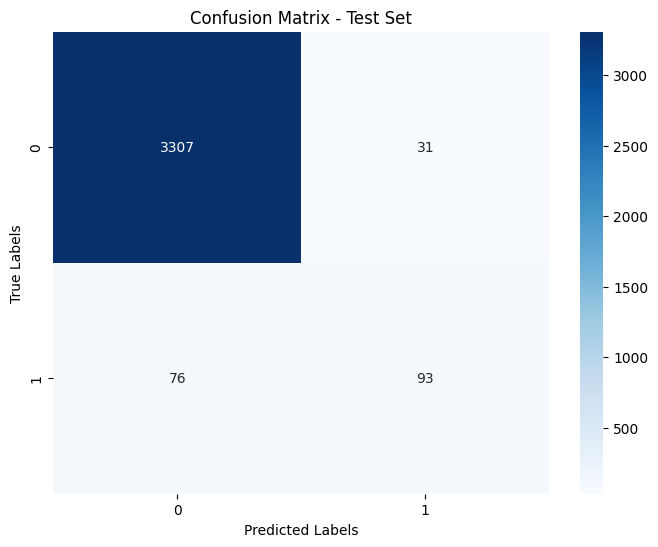

In [39]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [40]:
# Define the range of k values
k = list(range(1, 50, 2))

train_accuracy = []
cv_accuracy = []

# Loop over the range of k values to tune hyperparameter
for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on train and CV sets
    y_train_pred= knn.predict(X_train)
    y_cv_pred = knn.predict(X_cv)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))


# Find the optimal k based on maximum CV accuracy
optimal_k = k[cv_accuracy.index(max(cv_accuracy))]


# Apply log transformation to k for plotting
k_log = [math.log(x) for x in k]
print(optimal_k)

1


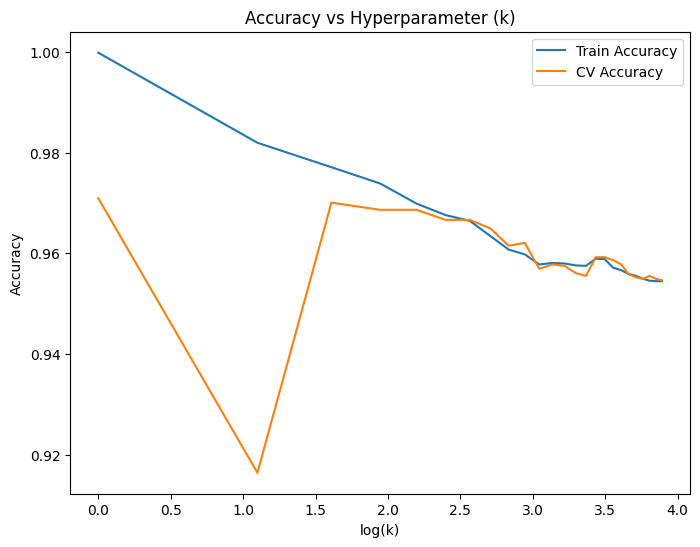

In [41]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import math

# ... (Your existing code) ...

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
train_accuracy_knn = accuracy_score(y_train, y_train_pred)
test_accuracy_knn = accuracy_score(y_test, y_test_pred)
cv_accuracy_knn = accuracy_score(y_cv, y_cv_pred)

train_precision_knn = precision_score(y_train, y_train_pred, average='macro')
test_precision_knn = precision_score(y_test, y_test_pred, average='macro')
cv_precision_knn = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_knn = recall_score(y_train, y_train_pred, average='macro')
test_recall_knn = recall_score(y_test, y_test_pred, average='macro')
cv_recall_knn = recall_score(y_cv, y_cv_pred, average='macro')

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_cv = confusion_matrix(y_cv, y_cv_pred)

# Extract TN, FP, FN, TP from confusion matrices
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()

# Calculate specificity and sensitivity
train_specificity = TN_train / (TN_train + FP_train) if (TN_train + FP_train) !=0 else 0
test_specificity = TN_test / (TN_test + FP_test) if (TN_test + FP_test) !=0 else 0
cv_specificity = TN_cv / (TN_cv + FP_cv) if (TN_cv + FP_cv) != 0 else 0

train_sensitivity = TP_train / (TP_train + FN_train) if (TP_train + FN_train) != 0 else 0
test_sensitivity = TP_test / (TP_test + FN_test) if (TP_test + FN_test) != 0 else 0
cv_sensitivity = TP_cv / (TP_cv + FN_cv) if (TP_cv + FN_cv) != 0 else 0



In [43]:

# Save the fitted TF-IDF vectorizer to a pickle file
with open('knn.pkl', 'wb') as file:
    pickle.dump(knn, file)


In [44]:
print(train_accuracy_knn)
print(test_accuracy_knn)
print(cv_accuracy_knn)
print(train_precision_knn)
print(test_precision_knn)
print(cv_precision_knn)
print(train_recall_knn)
print(test_recall_knn)
print(cv_recall_knn)
print(train_specificity)
print(test_specificity)
print(cv_specificity)
print(train_sensitivity)
print(test_sensitivity)
print(cv_sensitivity)


0.9998098678581614
0.9697747362418021
0.9709153122326775
0.9999001298312193
0.8333919921218069
0.8533333200091138
0.9980314960629921
0.8408739598881093
0.813385225181787
1.0
0.9835230677052127
0.9877171959257041
0.9960629921259843
0.6982248520710059
0.6390532544378699


In [45]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','train_specificity','test_specificity','cv_specificity','train_sensitivity','test_sensitivity','cv_sensitivity']
knn= pd.DataFrame([['KNN',train_accuracy_knn,test_accuracy_knn,cv_accuracy_knn,train_precision_knn,test_precision_knn,cv_precision_knn,train_recall_knn,test_recall_knn,cv_recall_knn,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity]],columns=col)
#results.loc[1] = new

In [46]:

knn

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,KNN,0.99981,0.969775,0.970915,0.9999,0.833392,0.853333,0.998031,0.840874,0.813385,1.0,0.983523,0.987717,0.996063,0.698225,0.639053


# nave bayes algarithm

In [47]:
# Train the navie bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = mnb.predict(X_test)
y_cv_pred = mnb.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Confusion matrix for cross-validation data
cm_cv = confusion_matrix(y_cv, y_cv_pred)
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()


# Specificity
test_specificity = TN_test / (TN_test + FP_test)
cv_specificity = TN_cv / (TN_cv + FP_cv)


# Sensitivity (Recall)
test_Sensitivity  = TP_test / (TP_test + FN_test)
cv_Sensitivity  = TP_cv / (TP_cv + FN_cv)


In [48]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(test_specificity)
print(cv_specificity)
print(test_Sensitivity)
print(cv_Sensitivity)

0.9520958083832335
0.9523809523809523
0.9520958083832335
0.9523809523809523
0.9520958083832335
0.9523809523809523
0.9976033553025764
0.9982025164769323
0.05325443786982249
0.047337278106508875


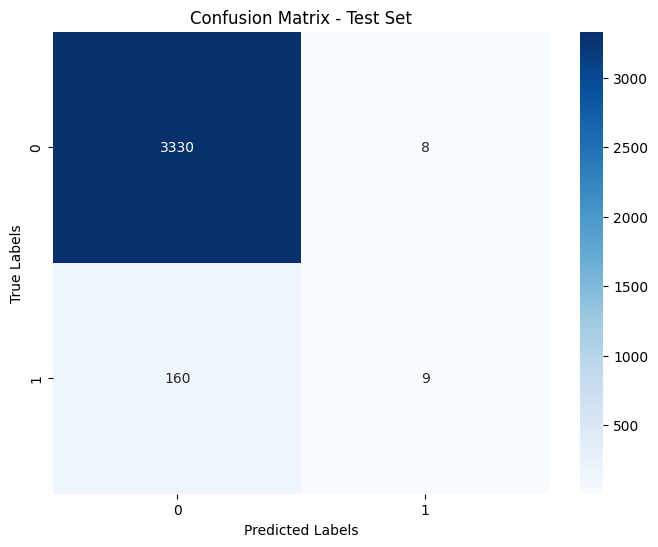

In [49]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [51]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [52]:
print(optimal_alpha)

0.001


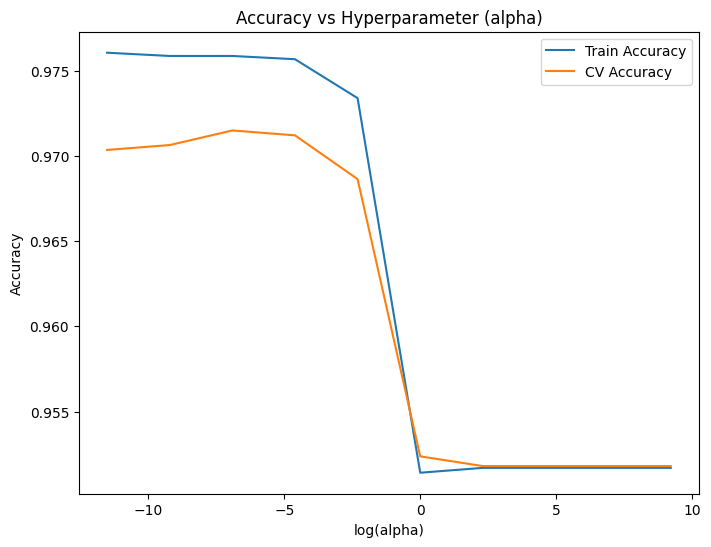

In [53]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred= clf.predict(X_cv)


# Evaluate the model
train_accuracy_nb = accuracy_score(y_train, y_train_pred)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)
cv_accuracy_nb= accuracy_score(y_cv, y_cv_pred)

train_precision_nb = precision_score(y_train, y_train_pred, average='macro')
test_precision_nb = precision_score(y_test, y_test_pred, average='macro')
cv_precision_nb = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_nb = recall_score(y_train, y_train_pred, average='macro')
test_recall_nb = recall_score(y_test, y_test_pred, average='macro')
cv_recall_nb = recall_score(y_cv, y_cv_pred, average='macro')

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_cv = confusion_matrix(y_cv, y_cv_pred)

# Extract TN, FP, FN, TP from confusion matrices
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()

# Calculate specificity and sensitivity
train_specificity_nb = TN_train / (TN_train + FP_train) if (TN_train + FP_train) !=0 else 0
test_specificity_nb = TN_test / (TN_test + FP_test) if (TN_test + FP_test) !=0 else 0
cv_specificity_nb = TN_cv / (TN_cv + FP_cv) if (TN_cv + FP_cv) != 0 else 0

train_sensitivity_nb = TP_train / (TP_train + FN_train) if (TP_train + FN_train) != 0 else 0
test_sensitivity_nb = TP_test / (TP_test + FN_test) if (TP_test + FN_test) != 0 else 0
cv_sensitivity_nb = TP_cv / (TP_cv + FN_cv) if (TP_cv + FN_cv) != 0 else 0



In [55]:
# Save the fitted TF-IDF vectorizer to a pickle file
with open('nb.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [56]:
print(train_accuracy_nb)
print(test_accuracy_nb)
print(cv_accuracy_nb)
print(train_precision_nb)
print(test_precision_nb)
print(cv_precision_nb)
print(train_recall_nb)
print(test_recall_nb)
print(cv_recall_nb)
print(train_specificity_nb)
print(test_specificity_nb)
print(cv_specificity_nb)
print(train_sensitivity_nb)
print(test_sensitivity_nb)
print(cv_sensitivity_nb)


0.9758532179865006
0.9703450242372398
0.9714856002281153
0.9517380652676519
0.915251756440281
0.960031804929764
0.7705547519775491
0.7288219569525741
0.7153771701865909
0.997802417340925
0.9961054523666867
0.9988016776512882
0.5433070866141733
0.46153846153846156
0.4319526627218935


In [57]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','train_specificity','test_specificity','cv_specificity','train_sensitivity','test_sensitivity','cv_sensitivity']
nb= pd.DataFrame([['NB',train_accuracy_nb,test_accuracy_nb,cv_accuracy_nb,train_precision_nb,test_precision_nb,cv_precision_nb,train_recall_nb,test_recall_nb,cv_recall_nb,train_specificity_nb,test_specificity_nb,cv_specificity_nb,train_sensitivity_nb,test_sensitivity_nb,cv_sensitivity_nb]],columns=col)


In [58]:
nb

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,NB,0.975853,0.970345,0.971486,0.951738,0.915252,0.960032,0.770555,0.728822,0.715377,0.997802,0.996105,0.998802,0.543307,0.461538,0.431953


In [59]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,KNN,0.999810,0.969775,0.970915,0.999900,0.833392,0.853333,0.998031,0.840874,0.813385,1.000000,0.983523,0.987717,0.996063,0.698225,0.639053
1,NB,0.975853,0.970345,0.971486,0.951738,0.915252,0.960032,0.770555,0.728822,0.715377,0.997802,0.996105,0.998802,0.543307,0.461538,0.431953



# Logistic RegressionL1

In [60]:

# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='l1',solver='liblinear')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)
# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Confusion matrix for cross-validation data
cm_cv = confusion_matrix(y_cv, y_cv_pred)
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()


# Specificity
test_specificity = TN_test / (TN_test + FP_test)
cv_specificity = TN_cv / (TN_cv + FP_cv)


# Sensitivity (Recall)
test_Sensitivity  = TP_test / (TP_test + FN_test)
cv_Sensitivity  = TP_cv / (TP_cv + FN_cv)


In [61]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(test_specificity)
print(cv_specificity)
print(test_Sensitivity)
print(cv_Sensitivity)

0.9669232962646136
0.9652124322783006
0.9669232962646136
0.9652124322783006
0.9669232962646136
0.9652124322783006
0.9991012582384662
0.9985020970641102
0.33136094674556216
0.3076923076923077


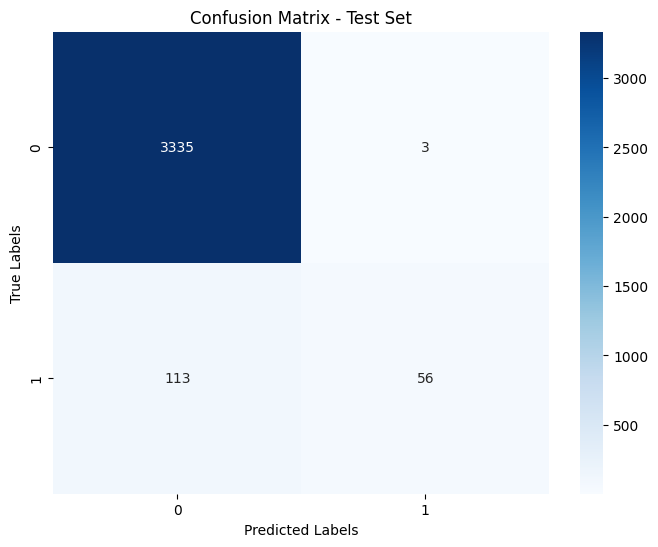

In [62]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [63]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [64]:
print(optimal_c)

10


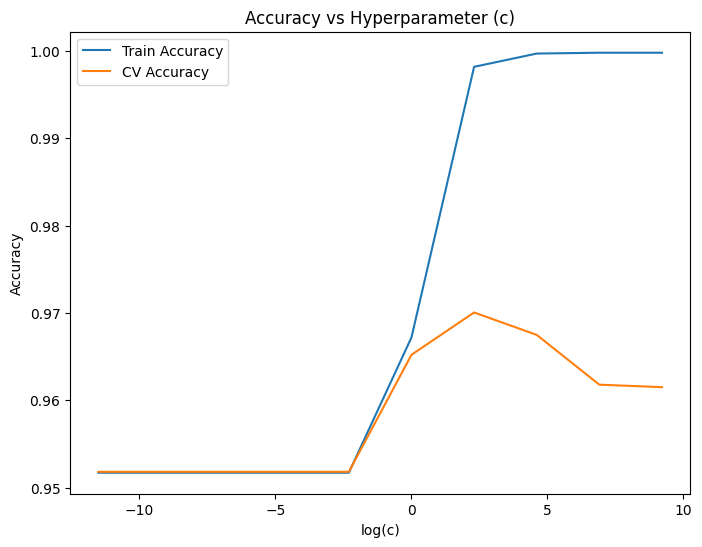

In [65]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
log = LogisticRegression(penalty='l1',C = optimal_c, solver='liblinear')
log.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_bow=log.predict(X_train)
y_test_pred_bow = log.predict(X_test)
y_cv_pred_bow = log.predict(X_cv)


# Evaluate the model
train_accuracy_log1 = accuracy_score(y_train, y_train_pred)
test_accuracy_log1 = accuracy_score(y_test, y_test_pred)
cv_accuracy_log1= accuracy_score(y_cv, y_cv_pred)

train_precision_log1 = precision_score(y_train, y_train_pred, average='macro')
test_precision_log1 = precision_score(y_test, y_test_pred, average='macro')
cv_precision_log1 = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_log1 = recall_score(y_train, y_train_pred, average='macro')
test_recall_log1 = recall_score(y_test, y_test_pred, average='macro')
cv_recall_log1 = recall_score(y_cv, y_cv_pred, average='macro')

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_cv = confusion_matrix(y_cv, y_cv_pred)

# Extract TN, FP, FN, TP from confusion matrices
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()

# Calculate specificity and sensitivity
train_specificity_log1 = TN_train / (TN_train + FP_train) if (TN_train + FP_train) !=0 else 0
test_specificity_log1 = TN_test / (TN_test + FP_test) if (TN_test + FP_test) !=0 else 0
cv_specificity_log1 = TN_cv / (TN_cv + FP_cv) if (TN_cv + FP_cv) != 0 else 0

train_sensitivity_log1 = TP_train / (TP_train + FN_train) if (TP_train + FN_train) != 0 else 0
test_sensitivity_log1 = TP_test / (TP_test + FN_test) if (TP_test + FN_test) != 0 else 0
cv_sensitivity_log1 = TP_cv / (TP_cv + FN_cv) if (TP_cv + FN_cv) != 0 else 0



In [67]:
# Save the fitted TF-IDF vectorizer to a pickle file
with open('log.pkl', 'wb') as file:
    pickle.dump(log, file)

In [68]:
print(train_accuracy_log1)
print(test_accuracy_log1)
print(cv_accuracy_log1)
print(train_precision_log1)
print(test_precision_log1)
print(cv_precision_log1)
print(train_recall_log1)
print(test_recall_log1)
print(cv_recall_log1)
print(train_specificity_log1)
print(test_specificity_log1)
print(cv_specificity_log1)
print(train_sensitivity_log1)
print(test_sensitivity_log1)
print(cv_sensitivity_log1)


0.9517064359730012
0.9669232962646136
0.9518106643855146
0.4758532179865006
0.9581899602815682
0.4759053321927573
0.5
0.6652311024920141
0.5
1.0
0.9991012582384662
1.0
0.0
0.33136094674556216
0.0


In [69]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','train_specificity','test_specificity','cv_specificity','train_sensitivity','test_sensitivity','cv_sensitivity']
log1= pd.DataFrame([['LOG1',train_accuracy_log1,test_accuracy_log1,cv_accuracy_log1,train_precision_log1,test_precision_log1,cv_precision_log1,train_recall_log1,test_recall_log1,cv_recall_log1,train_specificity_log1,test_specificity_log1,cv_specificity_log1,train_sensitivity_log1,test_sensitivity_log1,cv_sensitivity_log1]],columns=col)


In [70]:
log1

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,LOG1,0.951706,0.966923,0.951811,0.475853,0.95819,0.475905,0.5,0.665231,0.5,1.0,0.999101,1.0,0.0,0.331361,0.0


In [71]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,log1],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,KNN,0.999810,0.969775,0.970915,0.999900,0.833392,0.853333,0.998031,0.840874,0.813385,1.000000,0.983523,0.987717,0.996063,0.698225,0.639053
1,NB,0.975853,0.970345,0.971486,0.951738,0.915252,0.960032,0.770555,0.728822,0.715377,0.997802,0.996105,0.998802,0.543307,0.461538,0.431953
2,LOG1,0.951706,0.966923,0.951811,0.475853,0.958190,0.475905,0.500000,0.665231,0.500000,1.000000,0.999101,1.000000,0.000000,0.331361,0.000000


# svm

In [72]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC



log = LinearSVC()
log.fit(X_train, y_train)
# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)
# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Confusion matrix for cross-validation data
cm_cv = confusion_matrix(y_cv, y_cv_pred)
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()


# Specificity
test_specificity = TN_test / (TN_test + FP_test)
cv_specificity = TN_cv / (TN_cv + FP_cv)


# Sensitivity (Recall)
test_Sensitivity  = TP_test / (TP_test + FN_test)
cv_Sensitivity  = TP_cv / (TP_cv + FN_cv)


In [73]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(test_specificity)
print(cv_specificity)
print(test_Sensitivity)
print(cv_Sensitivity)

0.979469632164243
0.9749073282007413
0.979469632164243
0.9749073282007413
0.979469632164243
0.9749073282007413
0.9970041941282205
0.9973037747153984
0.6331360946745562
0.5325443786982249


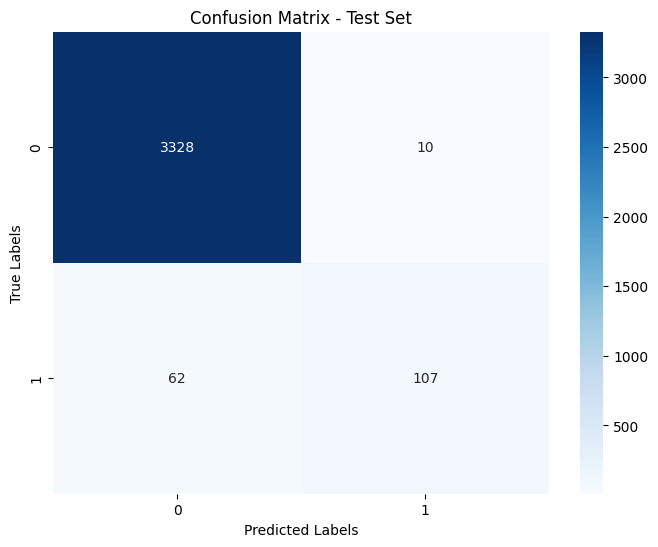

In [74]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [75]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [76]:
print(optimal_c)

10000


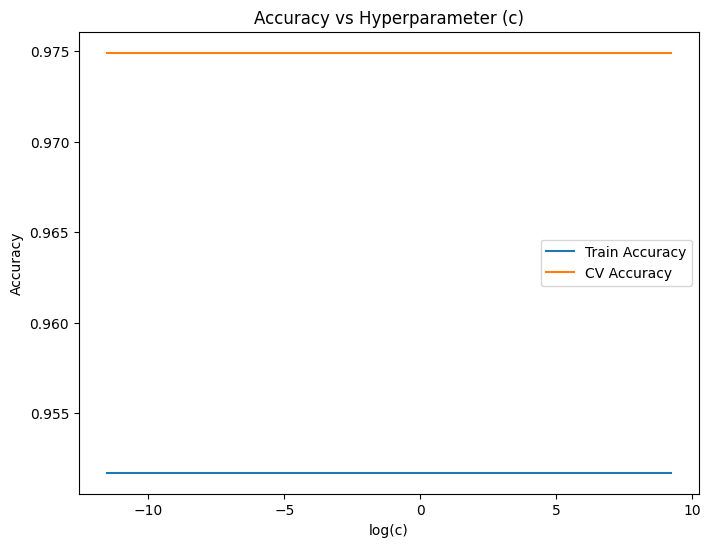

In [77]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
svm = LinearSVC(C=optimal_c)
svm.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=svm.predict(X_train)
y_test_pred = svm.predict(X_test)
y_cv_pred = svm.predict(X_cv)


# Evaluate the model
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)
cv_accuracy_svm= accuracy_score(y_cv, y_cv_pred)

train_precision_svm = precision_score(y_train, y_train_pred, average='macro')
test_precision_svm = precision_score(y_test, y_test_pred, average='macro')
cv_precision_svm = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_svm = recall_score(y_train, y_train_pred, average='macro')
test_recall_svm = recall_score(y_test, y_test_pred, average='macro')
cv_recall_svm= recall_score(y_cv, y_cv_pred, average='macro')

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_cv = confusion_matrix(y_cv, y_cv_pred)

# Extract TN, FP, FN, TP from confusion matrices
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
TN_cv, FP_cv, FN_cv, TP_cv = cm_cv.ravel()

# Calculate specificity and sensitivity
train_specificity_svm = TN_train / (TN_train + FP_train) if (TN_train + FP_train) !=0 else 0
test_specificity_svm = TN_test / (TN_test + FP_test) if (TN_test + FP_test) !=0 else 0
cv_specificity_svm = TN_cv / (TN_cv + FP_cv) if (TN_cv + FP_cv) != 0 else 0

train_sensitivity_svm = TP_train / (TP_train + FN_train) if (TP_train + FN_train) != 0 else 0
test_sensitivity_svm = TP_test / (TP_test + FN_test) if (TP_test + FN_test) != 0 else 0
cv_sensitivity_svm = TP_cv / (TP_cv + FN_cv) if (TP_cv + FN_cv) != 0 else 0



In [79]:
# Save the fitted TF-IDF vectorizer to a pickle file
with open('svm.pkl', 'wb') as file:
    pickle.dump(svm, file)

In [80]:
print(train_accuracy_svm)
print(test_accuracy_svm)
print(cv_accuracy_svm)
print(train_precision_svm)
print(test_precision_svm)
print(cv_precision_svm)
print(train_recall_svm)
print(test_recall_svm)
print(cv_recall_svm)
print(train_specificity_svm)
print(test_specificity_svm)
print(cv_specificity_svm)
print(train_sensitivity_svm)
print(test_sensitivity_svm)
print(cv_sensitivity_svm)


0.9997148017872421
0.9734816082121471
0.9674935842600513
0.999850209706411
0.8515000272918316
0.8262883650822527
0.9970472440944882
0.8652915504093086
0.8115877416587192
1.0
0.9850209706411025
0.9841222288795686
0.9940944881889764
0.7455621301775148
0.6390532544378699


In [81]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','train_specificity','test_specificity','cv_specificity','train_sensitivity','test_sensitivity','cv_sensitivity']
svm= pd.DataFrame([['SVM',train_accuracy_svm,test_accuracy_svm,cv_accuracy_svm,train_precision_svm,test_precision_svm,cv_precision_svm,train_recall_svm,test_recall_svm,cv_recall_svm,train_specificity_svm,test_specificity_svm,cv_specificity_svm,train_sensitivity_svm,test_sensitivity_svm,cv_sensitivity_svm]],columns=col)


In [82]:
svm

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,SVM,0.999715,0.973482,0.967494,0.99985,0.8515,0.826288,0.997047,0.865292,0.811588,1.0,0.985021,0.984122,0.994094,0.745562,0.639053


In [83]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,log1,svm],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,train_specificity,test_specificity,cv_specificity,train_sensitivity,test_sensitivity,cv_sensitivity
0,KNN,0.999810,0.969775,0.970915,0.999900,0.833392,0.853333,0.998031,0.840874,0.813385,1.000000,0.983523,0.987717,0.996063,0.698225,0.639053
1,NB,0.975853,0.970345,0.971486,0.951738,0.915252,0.960032,0.770555,0.728822,0.715377,0.997802,0.996105,0.998802,0.543307,0.461538,0.431953
2,LOG1,0.951706,0.966923,0.951811,0.475853,0.958190,0.475905,0.500000,0.665231,0.500000,1.000000,0.999101,1.000000,0.000000,0.331361,0.000000
3,SVM,0.999715,0.973482,0.967494,0.999850,0.851500,0.826288,0.997047,0.865292,0.811588,1.000000,0.985021,0.984122,0.994094,0.745562,0.639053
